# Setup Path dan Impor Modul

In [17]:
import sys
import os
import pandas as pd
import numpy as np
from pprint import pprint 

# Menambahkan path ke direktori utama agar bisa mengimpor modul noventis
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Impor kelas yang akan digunakan
from noventis.data_cleaner import NoventisImputer
print('Successfully imported modules!')

Successfully imported modules!


# Memuat Dataset

In [18]:
try:
    df_ames = pd.read_csv('../dataset_for_examples/AmesHousing.csv')
    print("Dataset Ames Housing berhasil dimuat.")
except FileNotFoundError:
    print("Error: Pastikan file 'AmesHousing.csv' dari dataset Ames Housing ada di direktori yang sama dengan notebook Anda.")

Dataset Ames Housing berhasil dimuat.


# Cek Nilai yang Hilang (Null Values)

In [19]:
# --- Sel 3: Cek Nilai yang Hilang (Null Values) ---
print("Analisis Awal: 15 kolom dengan nilai hilang terbanyak")
null_counts = df_ames.isnull().sum()
print(null_counts[null_counts > 0].sort_values(ascending=False).head(15))

Analisis Awal: 15 kolom dengan nilai hilang terbanyak
Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Yr Blt      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
dtype: int64


# Contoh 1 - Menggunakan Mode Otomatis

--- Menjalankan Imputer dengan Mode Otomatis ---

📊 Laporan Kualitas Imputasi:
{'completion_score': '100.00%',
 'missing_values_after': 0,
 'missing_values_before': 15749,
 'values_imputed': 15749}

📈 Perbandingan Visual Sebelum vs. Sesudah Imputasi:
Membuat visualisasi perbandingan untuk imputasi...


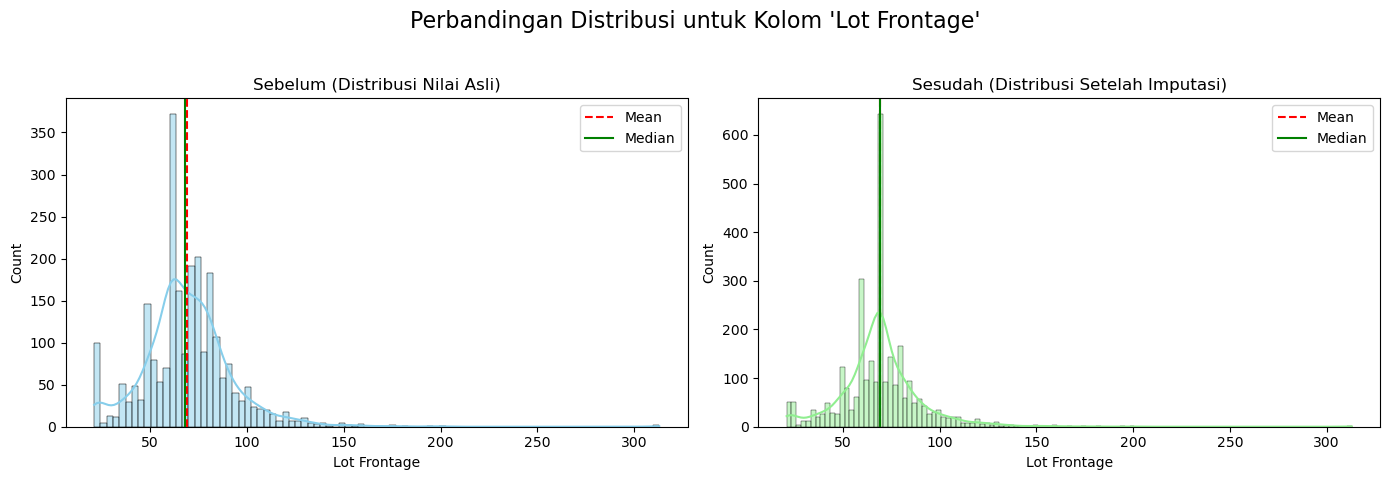

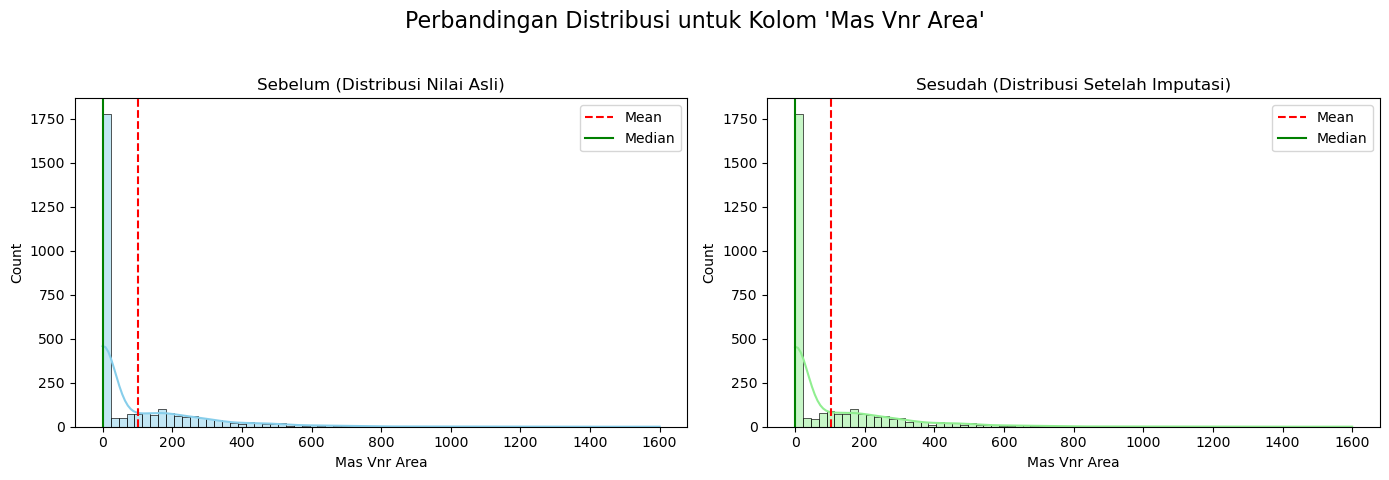

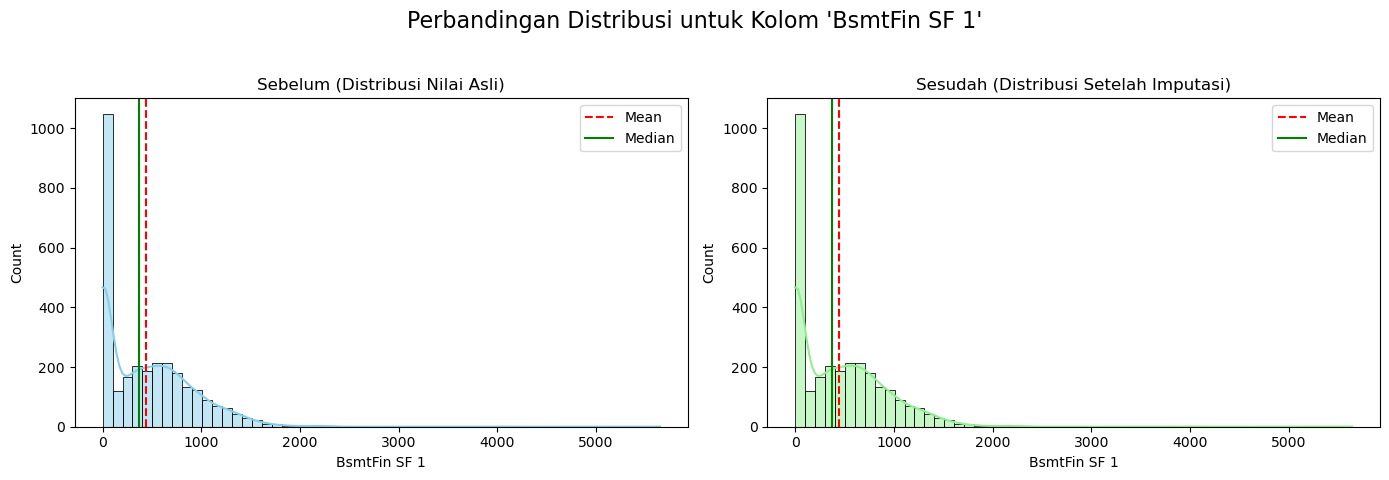


Total nilai null setelah proses: 0


In [20]:
print("--- Menjalankan Imputer dengan Mode Otomatis ---")

imputer_auto = NoventisImputer() 

df_ames_copy = df_ames.copy()
df_imputed_auto = imputer_auto.fit_transform(df_ames_copy)

print("\n📊 Laporan Kualitas Imputasi:")
report_auto = imputer_auto.get_quality_report()
pprint(report_auto)

print("\n📈 Perbandingan Visual Sebelum vs. Sesudah Imputasi:")
imputer_auto.plot_comparison(max_cols=3) 

print(f"\nTotal nilai null setelah proses: {df_imputed_auto.isnull().sum().sum()}")

# Contoh 2 - Menggunakan Metode Spesifik per Kolom


--- Menjalankan Imputer dengan Metode Spesifik ---

📊 Laporan Kualitas Imputasi:
{'completion_score': '100.00%',
 'missing_values_after': 0,
 'missing_values_before': 15749,
 'values_imputed': 15749}

📈 Perbandingan Visual Sebelum vs. Sesudah Imputasi:
Membuat visualisasi perbandingan untuk imputasi...


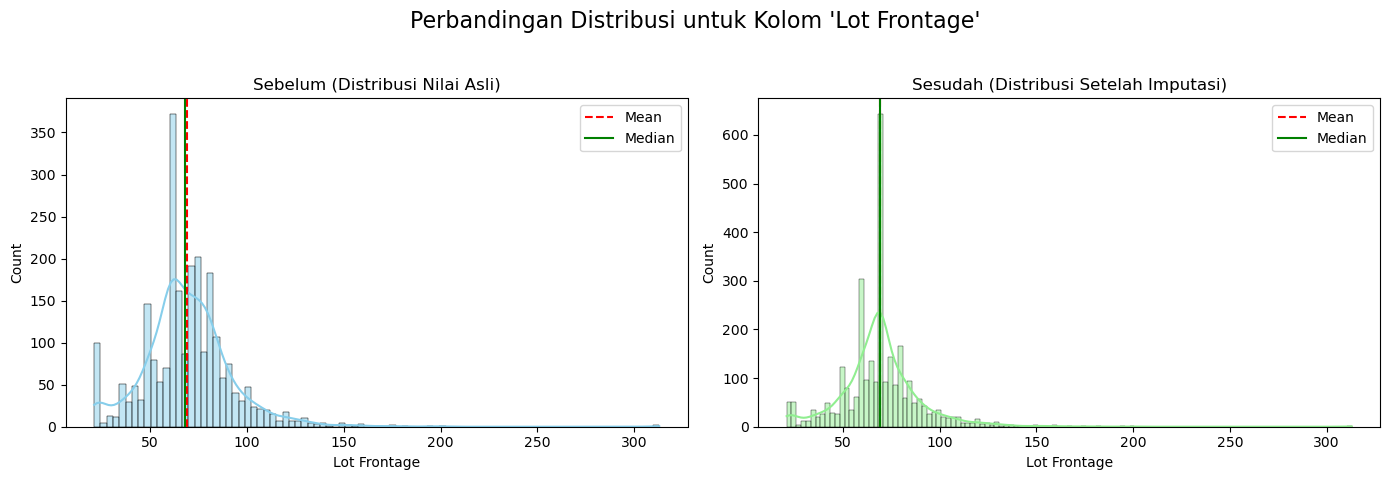

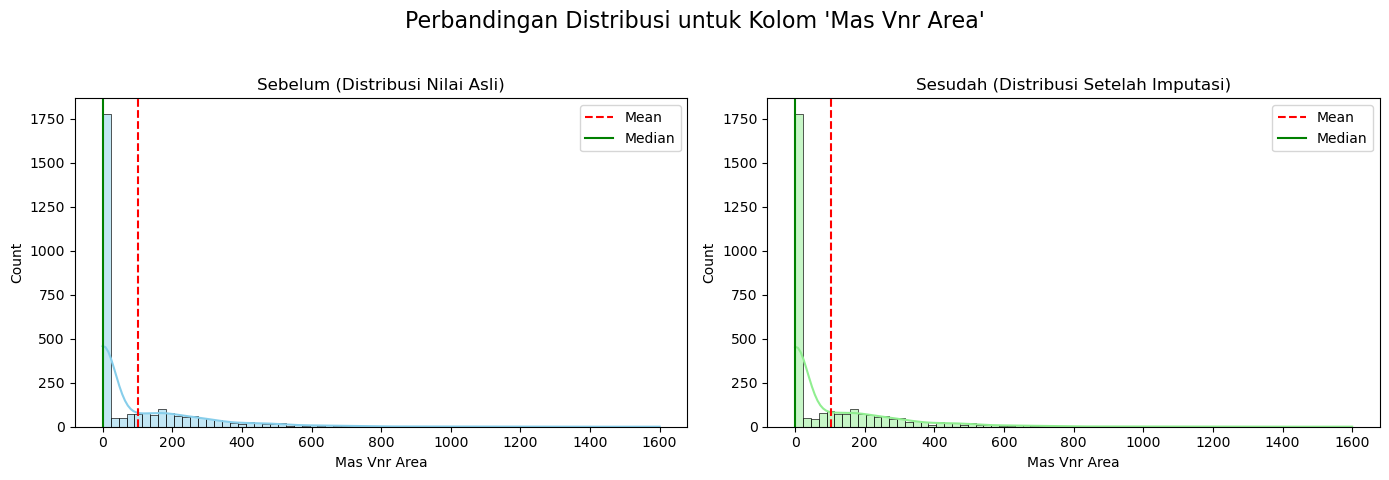

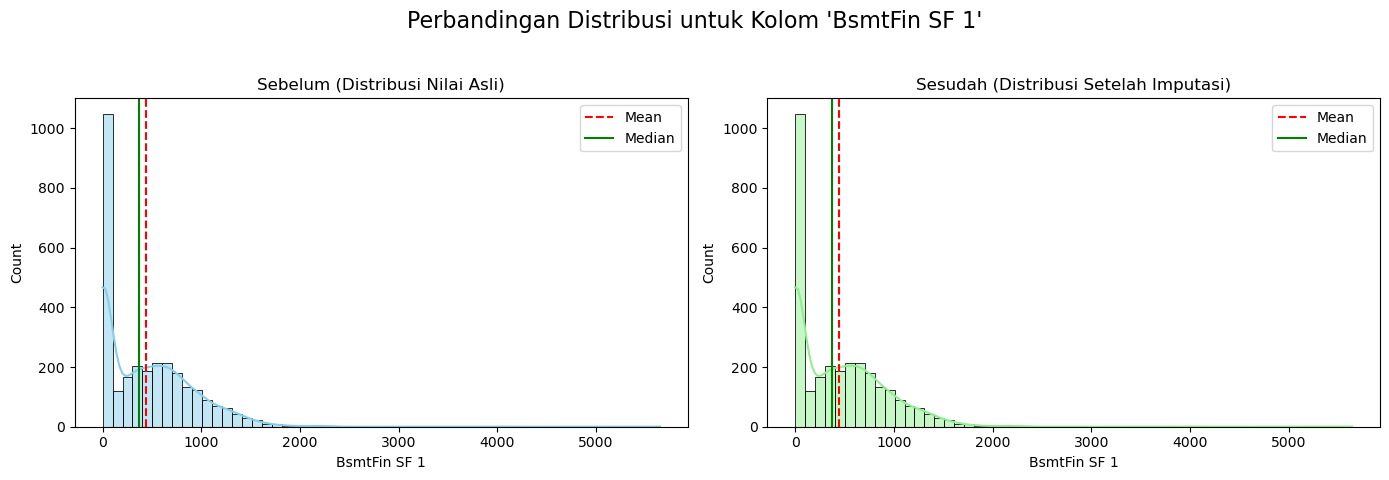


Total nilai null setelah proses: 0


In [21]:
print("\n--- Menjalankan Imputer dengan Metode Spesifik ---")

method_map = {
    'LotFrontage': 'median',       # Gunakan median untuk umur
    'Alley': 'mode',               # Gunakan modus
    'MasVnrArea': 'mean',          # Gunakan rata-rata
    'FireplaceQu': 'mode'
    # Kolom lain yang tidak ada di map akan diabaikan jika 'default_method' tidak diset
}

imputer_manual = NoventisImputer(method=method_map)

df_imputed_manual = imputer_manual.fit_transform(df_ames.copy())

print("\n📊 Laporan Kualitas Imputasi:")
report_auto = imputer_manual.get_quality_report()
pprint(report_auto)

print("\n📈 Perbandingan Visual Sebelum vs. Sesudah Imputasi:")
imputer_manual.plot_comparison(max_cols=3) 

print(f"\nTotal nilai null setelah proses: {df_imputed_manual.isnull().sum().sum()}")

# Contoh 3 - Menggunakan KNN Imputer


--- Menjalankan Imputer dengan Metode KNN ---

📊 Laporan Kualitas Imputasi:
{'completion_score': '100.00%',
 'missing_values_after': 0,
 'missing_values_before': 15749,
 'values_imputed': 15749}

📈 Perbandingan Visual Sebelum vs. Sesudah Imputasi:
Membuat visualisasi perbandingan untuk imputasi...


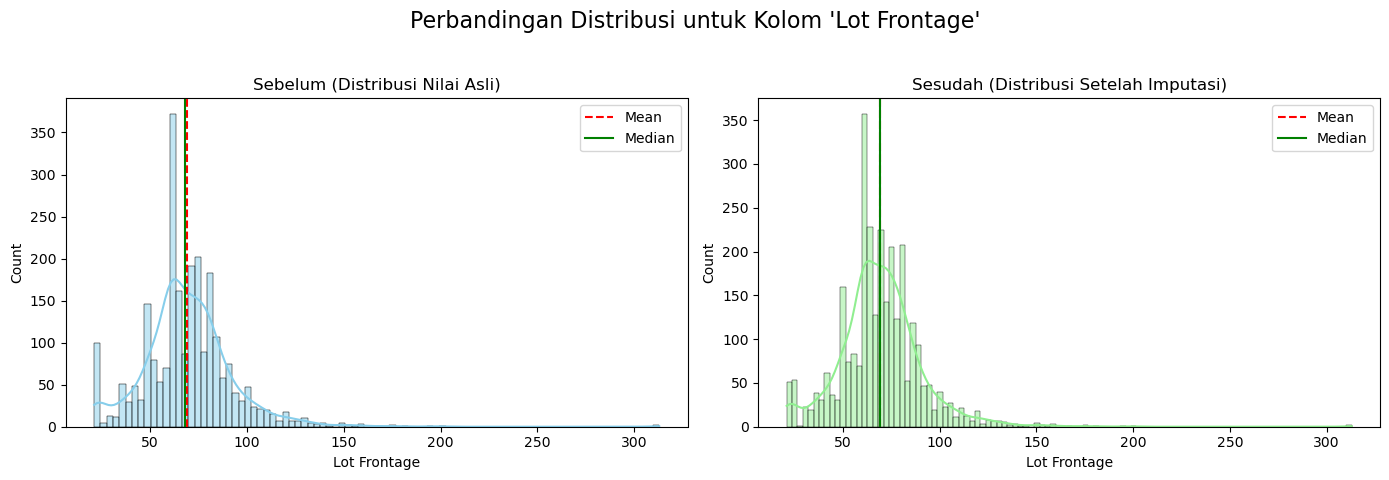

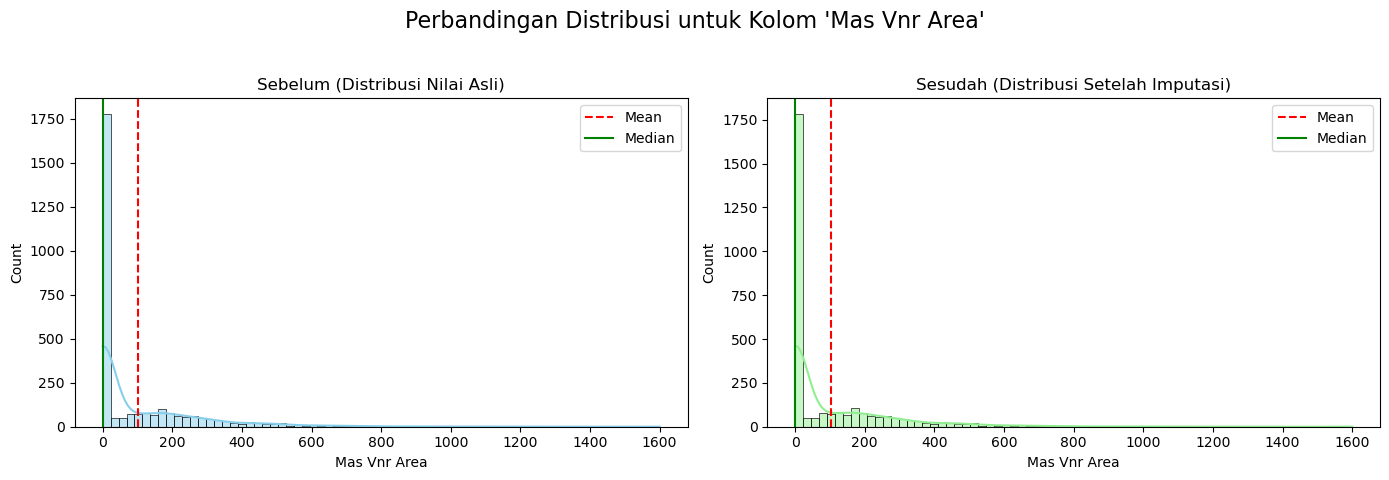

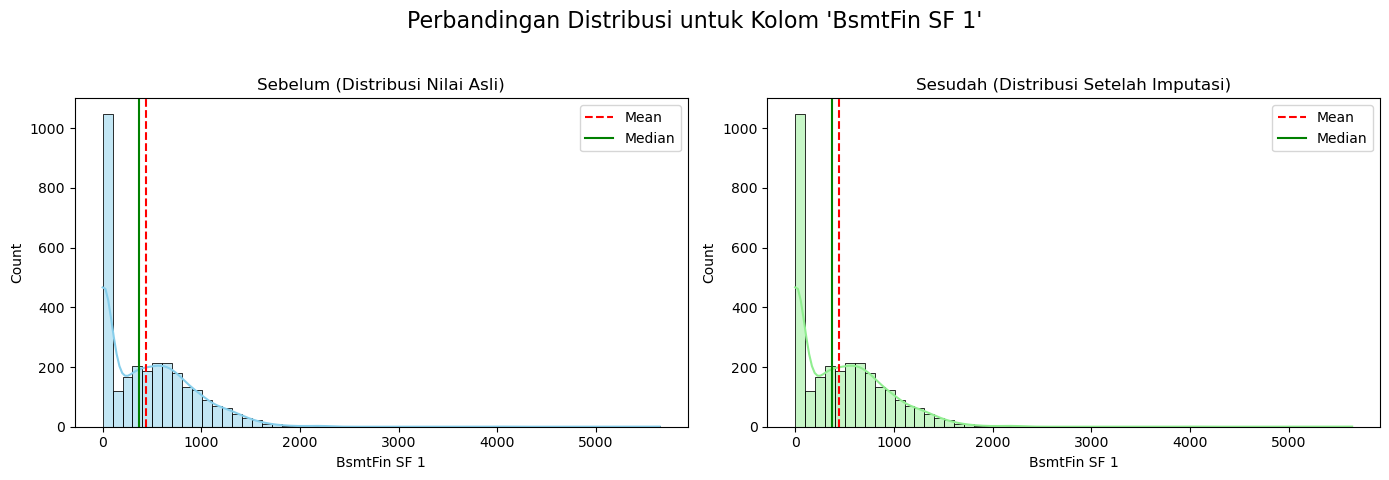


Total nilai null setelah proses: 0


In [22]:
print("\n--- Menjalankan Imputer dengan Metode KNN ---")

imputer_knn = NoventisImputer(method='knn', n_neighbors=5)

df_imputed_knn = imputer_knn.fit_transform(df_ames.copy())

print("\n📊 Laporan Kualitas Imputasi:")
report_auto = imputer_knn.get_quality_report()
pprint(report_auto)

print("\n📈 Perbandingan Visual Sebelum vs. Sesudah Imputasi:")
imputer_knn.plot_comparison(max_cols=3) 

print(f"\nTotal nilai null setelah proses: {df_imputed_knn.isnull().sum().sum()}")

# Contoh 4 - Menggunakan Metode Konstan

In [23]:
# --- Sel 7: Contoh 4 - Menggunakan Metode 'constant' ---
print("\n--- Menjalankan Imputer dengan Metode 'constant' ---")

# Skenario: Kita ingin mengisi semua nilai null di 'Mas Vnr Area' dengan 0
# dan 'Lot Frontage' dengan nilai rata-ratanya.

imputer_constant = NoventisImputer(columns=['Mas Vnr Area'], method='constant', fill_value=0)

df_ames_copy_2 = df_ames.copy()
df_imputed_constant = imputer_constant.fit_transform(df_ames_copy_2)

# Tampilkan laporan
print("\nLaporan Kualitas:")
pprint(imputer_constant.get_quality_report())

# Verifikasi
print("\nNilai null di 'Mas Vnr Area' setelah diisi dengan 0:")
print(df_imputed_constant['Mas Vnr Area'].isnull().sum())


--- Menjalankan Imputer dengan Metode 'constant' ---

Laporan Kualitas:
{'completion_score': '100.00%',
 'missing_values_after': 0,
 'missing_values_before': 23,
 'values_imputed': 23}

Nilai null di 'Mas Vnr Area' setelah diisi dengan 0:
0
